### Name : Shivanka Priyashan
### Index : 190476V

In [24]:
%matplotlib inline
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

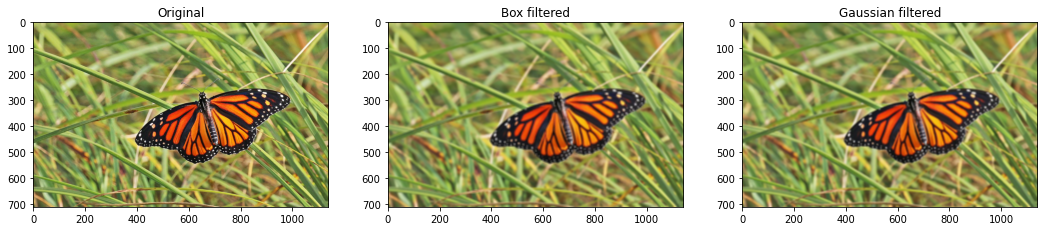

In [25]:
butterfly  = cv.imread("D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Exercise_03/butterfly.jpg",cv.IMREAD_COLOR)
assert butterfly is not None

butterfly_RGB = cv.cvtColor(butterfly,cv.COLOR_BGR2RGB)

kernel = np.ones((9,9),np.float32)/81
imgA = cv.filter2D(butterfly,-1,kernel)

imgB = cv.GaussianBlur(butterfly,(9,9),4)

imgA_RGB = cv.cvtColor(imgA,cv.COLOR_BGR2RGB)
imgB_RGB = cv.cvtColor(imgB,cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,3,figsize=(18,18))
axes[0].imshow(butterfly_RGB)
axes[0].set_title('Original')

axes[1].imshow(imgA_RGB)
axes[1].set_title('Box filtered')

axes[2].imshow(imgB_RGB)
axes[2].set_title('Gaussian filtered')
plt.show()

## Question 02

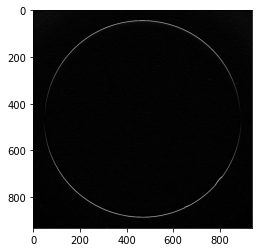

In [26]:
contact_lens = cv.imread("D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Exercise_03/contact_lens.tif",cv.IMREAD_COLOR)

kernel = np.array([(-1,-2,-1),(0,0,0,),(1,2,1)],dtype='float')

imgA = cv.filter2D(contact_lens,-1,kernel)


plt.imshow(imgA,cmap='gray')
plt.show()
